In [9]:
import pandas as pd
from textblob import TextBlob
import emoji
import matplotlib.pyplot as plt
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px
from plotly.offline import init_notebook_mode
plt.style.use('fivethirtyeight')

In [10]:
df_with_emojis = pd.read_csv("covidData_cleaned_lowercase_noStopwords_emojis.csv")
df_with_emojis.dropna(subset=['tweet_text'],inplace=True)

df_no_emojis = pd.read_csv("covidData_cleaned_lowercase_noStopwords_no_emojis.csv")
df_no_emojis.dropna(subset=['tweet_text'],inplace=True)

In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_label(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'  

In [15]:
df_no_emojis['TB_subjectivity_no_emoji'] = df_no_emojis['tweet_text'].apply(getSubjectivity)
df_no_emojis['TB_polarity_no_emoji'] = df_no_emojis['tweet_text'].apply(getPolarity)
df_no_emojis['TBsentiment_no_emoji'] = df_no_emojis['TB_polarity_no_emoji'].apply(get_sentiment_label)

# df_no_emojis.head()

In [16]:
def emoji_to_text(txt):
    clean=emoji.demojize(txt, delimiters=("", ""))
    return clean.replace("_",' ');

In [17]:
df_with_emojis['tweet_text_emojitise'] = df_with_emojis['tweet_text'].apply(emoji_to_text)

df_with_emojis['TB_subjectivity_with_emoji'] = df_with_emojis['tweet_text_emojitise'].apply(getSubjectivity)
df_with_emojis['TB_polarity_with_emoji'] = df_with_emojis['tweet_text_emojitise'].apply(getPolarity)
df_with_emojis['TBsentiment_with_emoji'] = df_with_emojis['TB_polarity_with_emoji'].apply(get_sentiment_label)

# df_with_emojis.head()

In [18]:
df_no_emojis['TBsentiment_no_emoji'].value_counts()

Neutral     450
Positive    437
Negative    111
Name: TBsentiment_no_emoji, dtype: int64

In [19]:
emojis_data = df_with_emojis['TBsentiment_with_emoji'].value_counts()
no_emojis_data = df_no_emojis['TBsentiment_no_emoji'].value_counts()

neutral = [emojis_data['Neutral'],no_emojis_data['Neutral']]
positive = [emojis_data['Positive'],no_emojis_data['Positive']]
negative = [emojis_data['Negative'],no_emojis_data['Negative']]

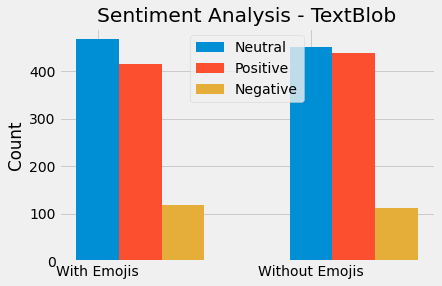

In [20]:
 
X = ['With Emojis','Without Emojis']
  
X_axis = np.arange(len(X))

plt.bar(X_axis, neutral, 0.2, label = 'Neutral')
plt.bar(X_axis + 0.2, positive, 0.2, label = 'Positive')
plt.bar(X_axis + 0.4, negative, 0.2, label = 'Negative')

plt.xticks(X_axis, X)
# plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.title("Sentiment Analysis - TextBlob")
plt.legend()
plt.show()

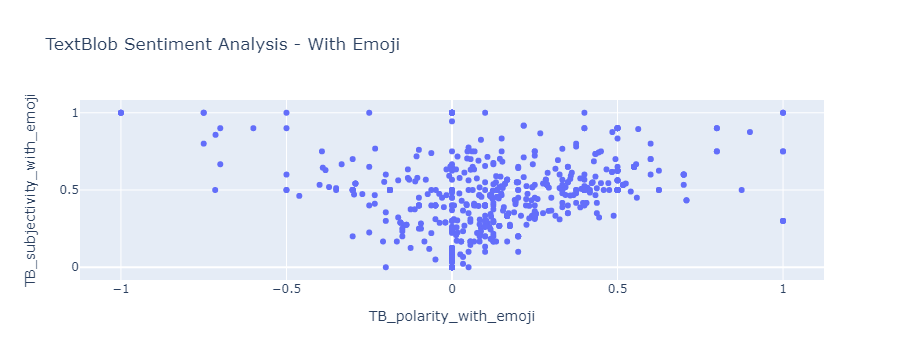

In [22]:
fig = px.scatter(df_with_emojis, x="TB_polarity_with_emoji", y="TB_subjectivity_with_emoji", hover_data=['tweet_text'],
                 title="TextBlob Sentiment Analysis - With Emoji")

fig.show()

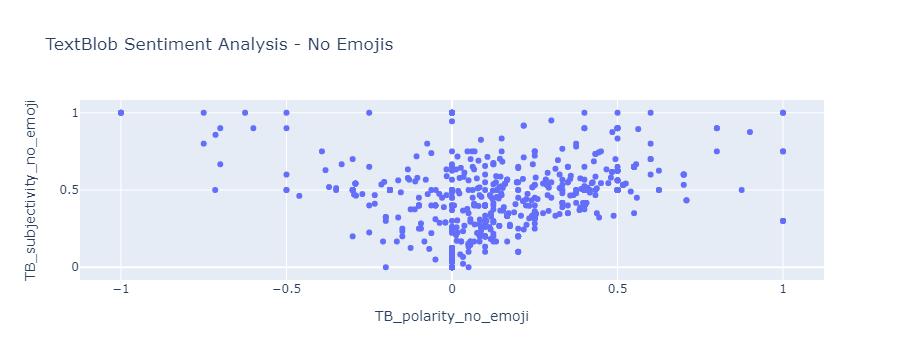

In [23]:
fig = px.scatter(df_no_emojis, x="TB_polarity_no_emoji", y="TB_subjectivity_no_emoji", hover_data=['tweet_text'],
                 title="TextBlob Sentiment Analysis - No Emojis")

fig.show()

In [24]:
analyser = SentimentIntensityAnalyzer()

def get_vaderCompoundPolarity(text):
    return analyser.polarity_scores(text)['compound']

In [25]:
df_no_emojis['vader_polarity_no_emoji'] = df_no_emojis['tweet_text'].apply(get_vaderCompoundPolarity)
df_no_emojis['Vader_sentiment_no_emoji'] = df_no_emojis['vader_polarity_no_emoji'].apply(get_sentiment_label)

df_with_emojis['vader_polarity_with_emoji'] = df_with_emojis['tweet_text_emojitise'].apply(getPolarity)
df_with_emojis['vader_sentiment_with_emoji'] = df_with_emojis['vader_polarity_with_emoji'].apply(get_sentiment_label)


In [29]:
emojis_data = df_with_emojis['vader_sentiment_with_emoji'].value_counts()
no_emojis_data = df_no_emojis['Vader_sentiment_no_emoji'].value_counts()

neutral = [emojis_data['Neutral'],no_emojis_data['Neutral']]
positive = [emojis_data['Positive'],no_emojis_data['Positive']]
negative = [emojis_data['Negative'],no_emojis_data['Negative']]

print(emojis_data.value_counts())
print(no_emojis_data.value_counts())

467    1
414    1
118    1
Name: vader_sentiment_with_emoji, dtype: int64
145    1
437    1
416    1
Name: Vader_sentiment_no_emoji, dtype: int64


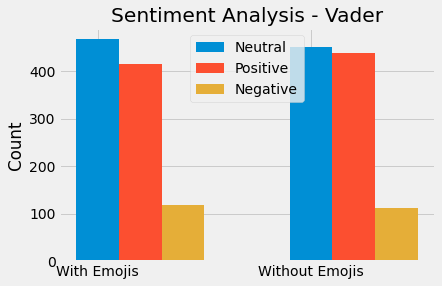

In [27]:
X = ['With Emojis','Without Emojis']
  
X_axis = np.arange(len(X))

plt.bar(X_axis, neutral, 0.2, label = 'Neutral')
plt.bar(X_axis + 0.2, positive, 0.2, label = 'Positive')
plt.bar(X_axis + 0.4, negative, 0.2, label = 'Negative')

plt.xticks(X_axis, X)
# plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.title("Sentiment Analysis - Vader")
plt.legend()
plt.show()